In [1]:
import pandas as pd

In [2]:
data=pd.read_csv('/content/SDN_DDoS_.csv')

In [3]:
import numpy as np
from sklearn.cluster import KMeans
print(data.describe())

       Flow Duration  Tot Fwd Pkts  ...      Idle Min         Label
count   7.602600e+04  76026.000000  ...  7.602600e+04  76026.000000
mean    1.226421e+07     10.626601  ...  3.577913e+06      0.099992
std     3.213794e+07    106.987206  ...  1.188393e+07      0.299991
min    -1.540000e+02      0.000000  ...  0.000000e+00      0.000000
25%     2.698000e+03      1.000000  ...  0.000000e+00      0.000000
50%     4.095000e+03      1.000000  ...  0.000000e+00      0.000000
75%     2.291778e+05      4.000000  ...  0.000000e+00      0.000000
max     1.200000e+08  16928.000000  ...  1.190000e+08      1.000000

[8 rows x 67 columns]


In [4]:
kmeans = KMeans(n_clusters=2)

In [5]:
X= data.drop('Label', axis=1)

In [6]:
kmeans.fit(X)

KMeans(n_clusters=2)

In [7]:
from sklearn.decomposition import PCA
pca = PCA(2)
#Transform the data
df = pca.fit_transform(data)
df.shape

(76026, 2)

In [8]:
#Import required module
from sklearn.cluster import KMeans
 
#Initialize the class object
kmeans = KMeans(n_clusters= 2)
 
#predict the labels of clusters.
label = kmeans.fit_predict(df)
 
print(label)

[0 0 0 ... 0 0 0]


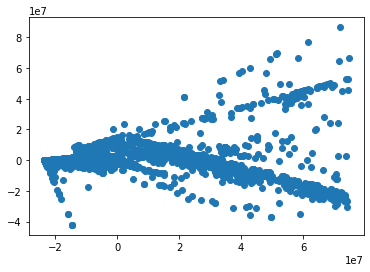

In [9]:
#plotting the individual cluster(Normal network flow)
import matplotlib.pyplot as plt
 
#filter rows of original data
filtered_label0 = df[label == 0]
 
#plotting the results
plt.scatter(filtered_label0[:,0] , filtered_label0[:,1])
plt.show()

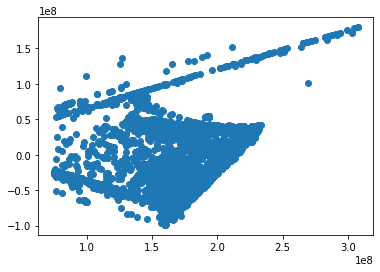

In [10]:
#plotting the individual cluster(DDoS attack)
import matplotlib.pyplot as plt
 
#filter rows of original data
filtered_label1 = df[label == 1]
 
#plotting the results
plt.scatter(filtered_label1[:,0] , filtered_label1[:,1])
plt.show()

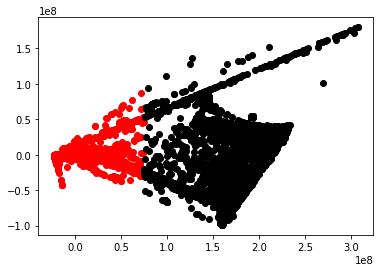

In [11]:
#filter rows of original data
filtered_label0 = df[label == 0]
 
filtered_label1 = df[label == 1]
 
#Plotting the results
plt.scatter(filtered_label0[:,0] , filtered_label0[:,1] , color = 'red')
plt.scatter(filtered_label1[:,0] , filtered_label1[:,1] , color = 'black')
plt.show()

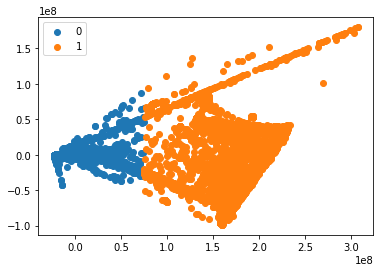

In [12]:
#Getting unique labels
 
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.legend()
plt.show()

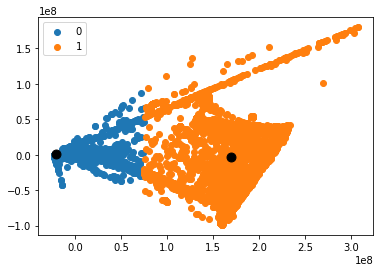

In [13]:
#Getting the Centroids
centroids = kmeans.cluster_centers_
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()

In [14]:
from sklearn.metrics import accuracy_score
accuracy_score(data.Label, label)

0.7923210480625049